In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [2]:
# Script parameters
input_csv = "results-yasmin/final.csv"
baseline = "x86_64,qemu,master"

In [3]:
# Parsing baseline argument
base_arch, base_runtime, base_tag = baseline.split(',')

In [4]:
# Read input file
df = pd.read_csv(input_csv, sep=';')
df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
0,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,698.984561,qemu,master
1,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,703.847189,qemu,master
2,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,700.268768,qemu,master
3,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,697.990938,qemu,master
4,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,703.355983,qemu,master
...,...,...,...,...,...,...,...,...,...,...
315,aarch64,phoenix.wordcount,/home/redha/benchmarks/phoenix-shared/phoenix-...,large,0.0,112.0,seconds,1.002847,native,native
316,aarch64,phoenix.wordcount,/home/redha/benchmarks/phoenix-shared/phoenix-...,large,0.0,112.0,seconds,1.066380,native,native
317,aarch64,phoenix.wordcount,/home/redha/benchmarks/phoenix-shared/phoenix-...,large,0.0,112.0,seconds,1.016791,native,native
318,aarch64,phoenix.wordcount,/home/redha/benchmarks/phoenix-shared/phoenix-...,large,0.0,112.0,seconds,1.372332,native,native


In [5]:
# Extract baseline from dataframe
base_df = df.loc[(df['arch'] == base_arch) & (df['runtime'] == base_runtime) & (df['tag'] == base_tag)]
base_df

,arch,bench,cmdline,dataset,retval,threads,unit,value,runtime,tag
0,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,698.984561,qemu,master
1,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,703.847189,qemu,master
2,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,700.268768,qemu,master
3,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,697.990938,qemu,master
4,x86_64,parsec.blackscholes,/home/redha/benchmarks/parsec-benchmark-x86_64...,native,0.0,112.0,seconds,703.355983,qemu,master
...,...,...,...,...,...,...,...,...,...,...
165,x86_64,phoenix.wordcount,/home/redha/benchmarks/phoenix-x86_64-shared/p...,large,0.0,112.0,seconds,4.631954,qemu,master
166,x86_64,phoenix.wordcount,/home/redha/benchmarks/phoenix-x86_64-shared/p...,large,0.0,112.0,seconds,4.664132,qemu,master
167,x86_64,phoenix.wordcount,/home/redha/benchmarks/phoenix-x86_64-shared/p...,large,0.0,112.0,seconds,4.656367,qemu,master
168,x86_64,phoenix.wordcount,/home/redha/benchmarks/phoenix-x86_64-shared/p...,large,0.0,112.0,seconds,4.615158,qemu,master


In [6]:
# Get the mean for each baseline benchmark
base_means = {}
for b in set(base_df['bench']):
    base_means[b] = np.array(base_df.loc[base_df['bench'] == b]['value'].values, dtype=np.float32).mean()

In [7]:
# Print the mean of every benchmark for each runtime
mean_df = pd.DataFrame()
for b in sorted(set(df['bench'])):
    df_b = df.loc[df['bench'] == b]
    tmp_dict = { 'bench': b }
    for t in set(df_b['tag']):
        df_b_t = df_b.loc[df_b['tag'] == t]
        tmp_dict[t] = np.mean(df_b_t['value'])
    mean_df = mean_df.append(tmp_dict, ignore_index=True)
mean_df

,bench,tcg-tso,no-fences,native,master
0,parsec.blackscholes,663.354508,435.714255,40.659252,700.889488
1,parsec.bodytrack,1916.344939,678.118165,59.541554,2205.374827
2,parsec.canneal,574.340606,490.492519,73.512610,591.815146
3,parsec.facesim,5990.389619,2395.231071,186.616323,6461.768714
4,parsec.fluidanimate,1903.976416,818.137424,104.951091,2091.395466
5,parsec.freqmine,831.195726,228.493285,44.889625,1035.727151
6,parsec.streamcluster,1878.103963,748.029587,101.869650,1992.230605
7,parsec.swaptions,745.099679,250.234131,24.638562,747.266666
8,parsec.vips,246.240387,89.627554,11.812231,294.067838
9,phoenix.histogram,2.326003,1.343587,0.560447,2.807168


In [8]:
# Normalize all results from original df to these means
df_norm = pd.DataFrame(columns=['arch', 'bench', 'dataset', 'threads', 'unit', 'value', 'runtime',
                                'tag', 'norm', 'label'])
norm_vals = []
for row in df.itertuples():
    try:
        if row.arch == base_arch and row.runtime == base_runtime and row.tag == base_tag:
            continue
        # norm = base_means[row.bench] / float(row.value)      # speedup
        norm = float(row.value) / base_means[row.bench]    # relative perf
        
        # norm = 100 * (base_means[row.bench] - float(row.value)) / base_means[row.bench]
        dct = row._asdict()
        dct['norm'] = norm
        dct['label'] = f"{dct['tag']}"
        # dct['label'] = f"{dct['runtime']}-{dct['tag']}"
        del dct['Index']
        del dct['cmdline']
        norm_vals.append(dct)
    except KeyError:
        pass
df_norm = df_norm.append(norm_vals, ignore_index=True)
df_norm

,arch,bench,dataset,threads,unit,value,runtime,tag,norm,label,retval
0,x86_64,parsec.blackscholes,native,112.0,seconds,434.150727,qemu,no-fences,0.619428,no-fences,0.0
1,x86_64,parsec.blackscholes,native,112.0,seconds,436.875024,qemu,no-fences,0.623315,no-fences,0.0
2,x86_64,parsec.blackscholes,native,112.0,seconds,432.765602,qemu,no-fences,0.617452,no-fences,0.0
3,x86_64,parsec.blackscholes,native,112.0,seconds,437.922886,qemu,no-fences,0.624810,no-fences,0.0
4,x86_64,parsec.blackscholes,native,112.0,seconds,436.857035,qemu,no-fences,0.623289,no-fences,0.0
...,...,...,...,...,...,...,...,...,...,...,...
235,aarch64,phoenix.wordcount,large,112.0,seconds,1.002847,native,native,0.216122,native,0.0
236,aarch64,phoenix.wordcount,large,112.0,seconds,1.066380,native,native,0.229814,native,0.0
237,aarch64,phoenix.wordcount,large,112.0,seconds,1.016791,native,native,0.219127,native,0.0
238,aarch64,phoenix.wordcount,large,112.0,seconds,1.372332,native,native,0.295749,native,0.0


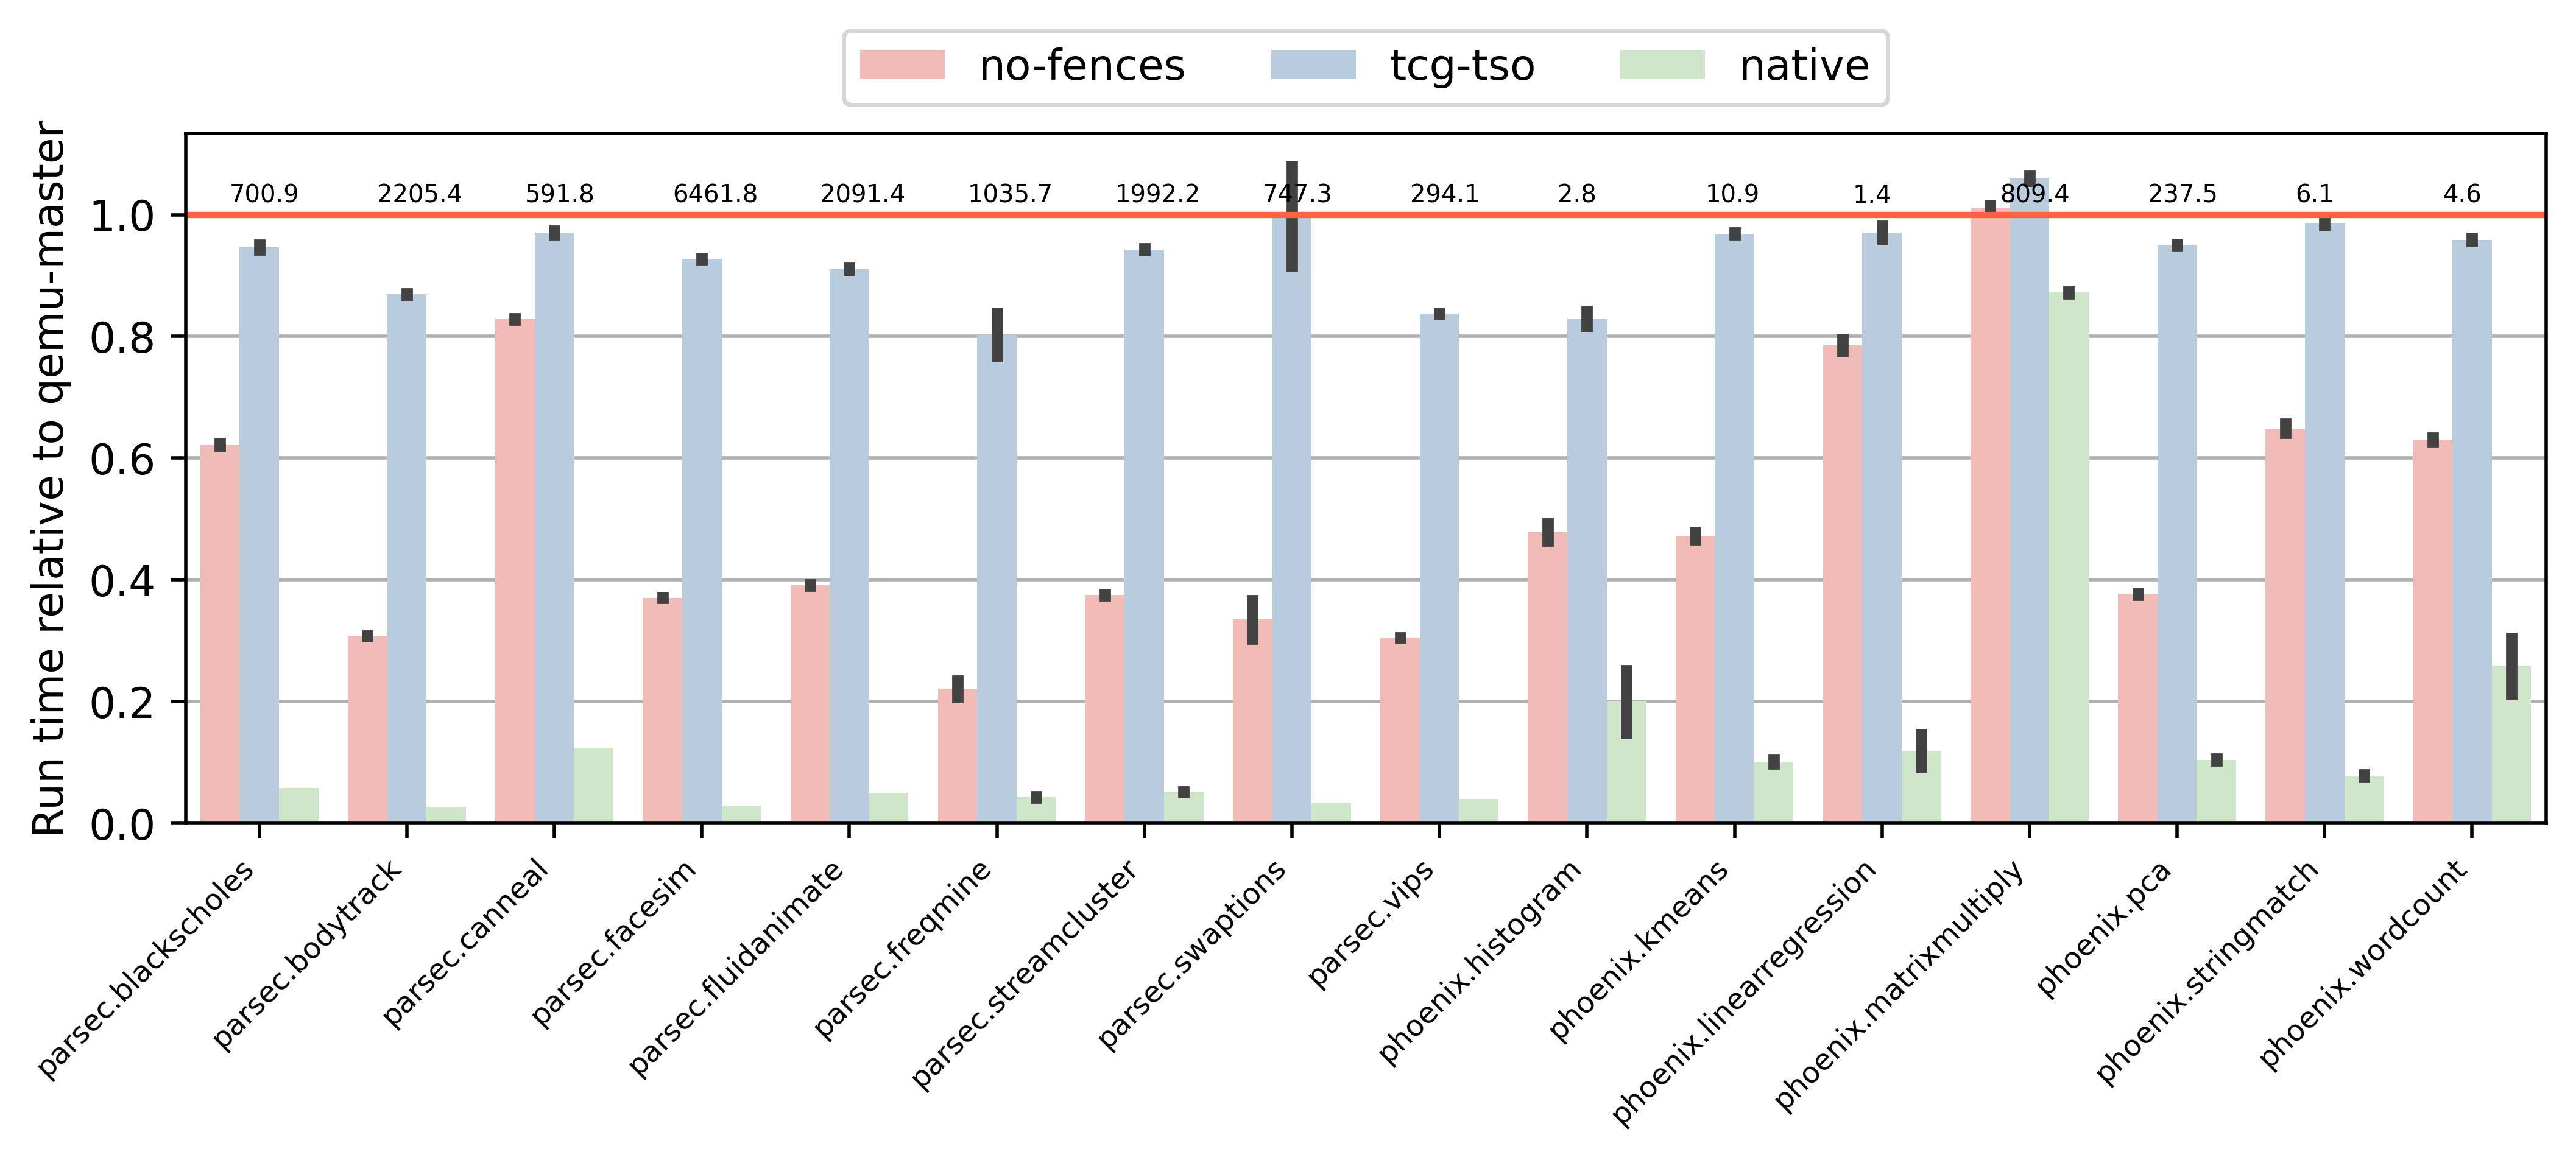

In [16]:
# Plot
fig = plt.figure(figsize=(10, 3), dpi=500)
palette = sbs.color_palette("Pastel1")
ax = sbs.barplot(data=df_norm, ci='sd',
                 x='bench', y='norm',
                 hue='label', palette=palette,
                 order=sorted(set(df_norm['bench'])))
plt.grid(b=True, axis='y')
plt.xticks(rotation=45, ha="right", fontsize='x-small')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),borderaxespad=0, ncol=4)
ax.set_axisbelow(True)
plt.xlabel("")
plt.ylabel("Run time relative to qemu-master")
plt.axhline(y=1, xmin=0, xmax=1, color='tomato')
# Annotate the raw value of the baseline
for idx, value in enumerate(sorted(set(base_means))):
    plt.text(idx - .2, 1.02, f"{base_means[value]:.1f}", fontsize='xx-small')

In [19]:
fig.savefig(f"{input_csv[:-3]}pdf", dpi=500, bbox_inches='tight')